In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
da = pd.read_csv("discharge.csv")

da.head()


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005


RMSE: 0.00
R^2: 0.000


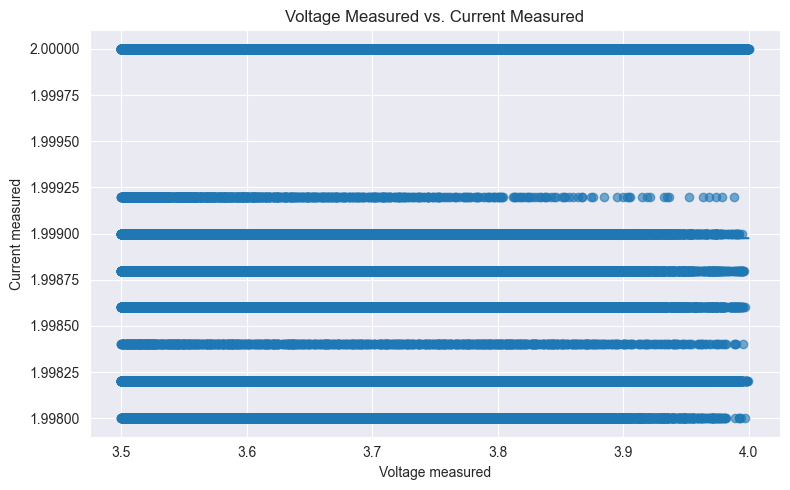

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target (keep as DataFrames)
"""X = da[['Voltage_measured']]
y = da[['Current_measured']]"""

# Fit model
model = LinearRegression()
#model.fit(X, y)

# Validate Linear Region
subset = da[(da['Voltage_measured'] > 3.5) & (da['Voltage_measured'] < 4.0)]
X_sub = subset[['Voltage_measured']]
y_sub = subset[['Current_measured']]

model.fit(X_sub, y_sub)


# Predictions on training data
y_pred = model.predict(X_sub)

# Metrics
rmse = np.sqrt(mean_squared_error(y_sub, y_pred))
r2 = r2_score(y_sub, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")

# Create regression line (must be 2D)
x_line = np.linspace(
    X_sub['Voltage_measured'].min(),
    X_sub['Voltage_measured'].max(),
    100
).reshape(-1, 1)

x_line_df = pd.DataFrame(x_line, columns=['Voltage_measured'])
y_line = model.predict(x_line_df)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_sub, y_sub, alpha=0.6)
plt.plot(x_line, y_line)
plt.xlabel("Voltage measured")
plt.ylabel("Current measured")
plt.title("Voltage Measured vs. Current Measured")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target (keep as DataFrames)
"""X = da[['Voltage_measured']]
y = da[['Current_measured']]"""

# Fit model
model = LinearRegression()
#model.fit(X, y)

# Validate Linear Region
subset = da[(da['Voltage_measured'] > 3.5) & (da['Voltage_measured'] < 4.0) & (da['type'] == 'discharge')]
X_sub = subset[['Voltage_measured']]
y_sub = subset[['Current_measured']]

model.fit(X_sub, y_sub)


# Predictions on training data
y_pred = model.predict(X_sub)

# Metrics
rmse = np.sqrt(mean_squared_error(y_sub, y_pred))
r2 = r2_score(y_sub, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")

# Create regression line (must be 2D)
x_line = np.linspace(
    X_sub['Voltage_measured'].min(),
    X_sub['Voltage_measured'].max(),
    100
).reshape(-1, 1)

x_line_df = pd.DataFrame(x_line, columns=['Voltage_measured'])
y_line = model.predict(x_line_df)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_sub, y_sub, alpha=0.6)
plt.plot(x_line, y_line)
plt.xlabel("Voltage measured")
plt.ylabel("Current measured")
plt.title("Voltage Measured vs. Current Measured")
plt.tight_layout()
plt.show()
